# Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# The shape of the Dataset and main Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that in Age, Cabin and Embarked some data are missed.
 - Age 714/891
 - Cabin 204/891
 - Embarked 889/891

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Seeing more details

In [6]:
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts(dropna=False))


Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


# Here we can visually see the missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<Axes: >

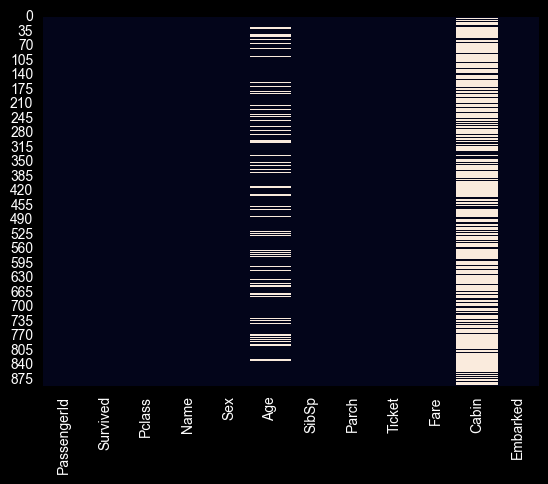

In [7]:
print(df.isna().sum())
sns.heatmap(df.isna(), cbar=False)


# Visualization of the Distribution

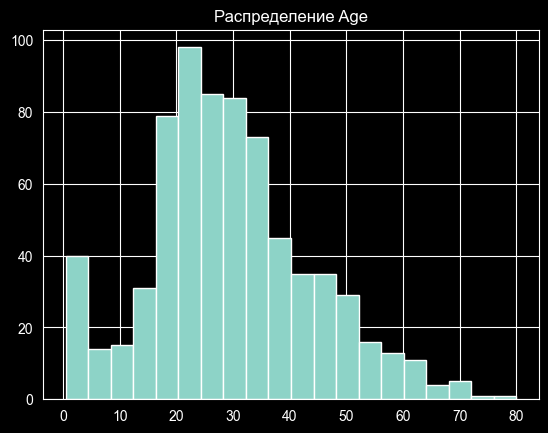

In [14]:
df['Age'].hist(bins=20)
plt.title("Распределение Age")
plt.show()

The age distribution shows that most passengers are between 20 and 40 years old

# Barplot and Countplot
Here we used:
 + Barplot - to see the probability of surviving for each class and sex
 + Countplot - to see in numbers passengers by sex and class

<Axes: xlabel='Sex', ylabel='Survived'>

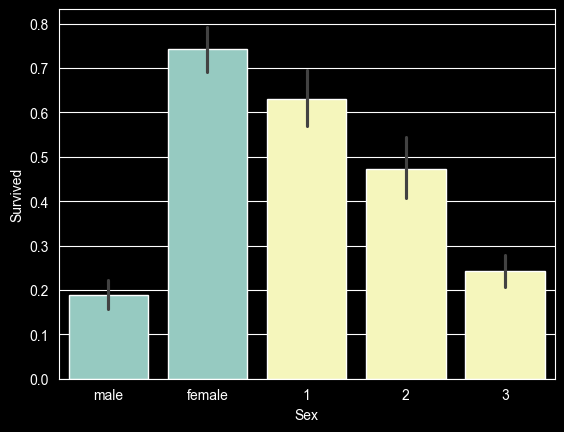

In [9]:
sns.barplot(x='Sex', y='Survived', data=df)
sns.barplot(x='Pclass', y='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

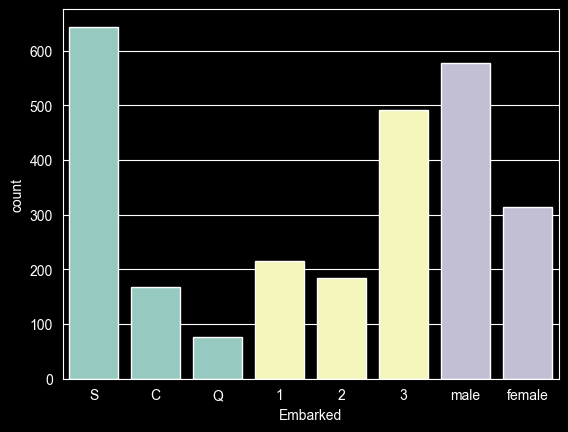

In [10]:
sns.countplot(x='Embarked', data=df)
sns.countplot(x='Pclass', data=df)
sns.countplot(x='Sex', data=df)


We can see that mostly the survivors are Females compared to Males and people with higher class

# Correlation

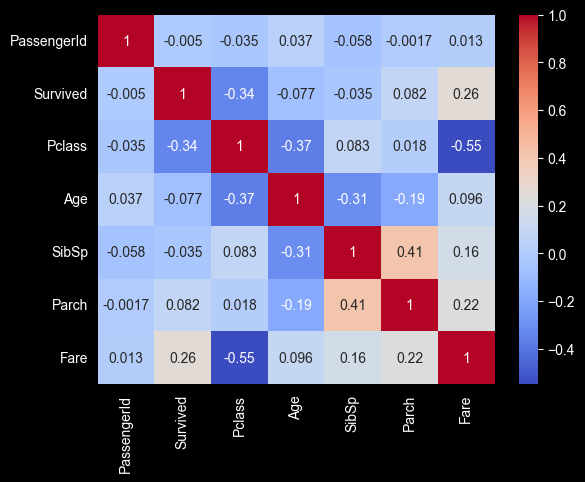

In [11]:
numeric_cols = df.select_dtypes(include=['int64','float64'])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Fare has a positive correlation with survival, meaning passengers with higher
ticket prices were more likely to survive.

Pclass shows a negative correlation with survival, indicating lower survival rates in lower classes.

Age has only a weak correlation with survival, so it is not a strong predictor on its own.


## Conclusion
- Females had a significantly higher survival chance rather than males
- Passengers from higher classes survived more often
- Fare shows positive correlation with survival
- Age has weak correlation with survival
- The dataset contains missing values, especially in Age
